In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#Normalize the data
x_train = x_train/255.0
x_test = x_test/255.0

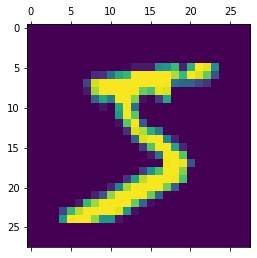

In [4]:
plt.matshow(x_train[0])

In [5]:
#Create a model:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(130,activation='softplus'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2923 - accuracy: 0.9160
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1554 - accuracy: 0.9541
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9685
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0791 - accuracy: 0.9759
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9818
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0480 - accuracy: 0.9849
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0383 - accuracy: 0.9876
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [8]:
model.save('hand_digits.model')

In [9]:
model = tf.keras.models.load_model('hand_digits.model')

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9760


[0.11573480069637299, 0.9760000109672546]

In [12]:
predicted = model.predict(x_test)

In [13]:
predicted_labels= [numpy.argmax(i) for i in predicted]

In [14]:
c_matrix = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
c_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    1,    0,    3,    2,    0,    2,    2,    3,    2],
       [   0, 1113,    2,    3,    0,    1,    1,    4,   11,    0],
       [   0,    0, 1014,    7,    1,    0,    1,    2,    6,    1],
       [   1,    0,    7,  993,    0,    1,    0,    1,    1,    6],
       [   0,    1,    5,    1,  962,    0,    2,    2,    1,    8],
       [   1,    0,    0,   23,    1,  862,    3,    0,    1,    1],
       [   1,    2,    2,    3,    3,   11,  933,    0,    2,    1],
       [   2,    0,   12,   13,    3,    2,    0,  979,    5,   12],
       [   1,    0,    1,   17,    3,    6,    1,    2,  940,    3],
       [   1,    2,    0,    8,    5,    4,    0,    2,    4,  983]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

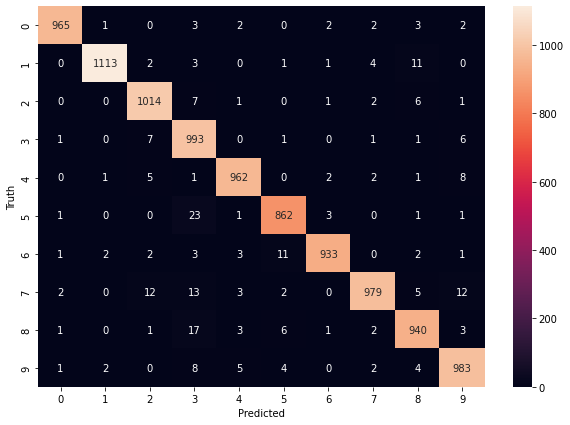

In [98]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(c_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Let's try the model on some data we created in paint

In [17]:
import cv2

In [116]:
images = [1,3,4,6,0,7]
for i in images:
  img = cv2.imread(f'test{i}.png')
  img = np.invert(img[:,:,0])/255
  img = img.reshape(1,28,28)
  print(f'Image file test{i} is probably {numpy.argmax(model.predict(img))}')

Image file test1 is probably 1
Image file test3 is probably 3
Image file test4 is probably 4
Image file test6 is probably 6
Image file test0 is probably 0
Image file test7 is probably 2
